% 計算機実習 問題6.6 - ファイゲンバウム定数の評価
% 藤本將太郎
% October 1, 2014

# 計算機実習 問題6.6 - ファイゲンバウム定数の評価

## シミュレーションの目的

すでに問題6.2で見たように、隣り合う分岐の間の$r$の領域は周期の増大にしたがって小さくなる(表1)。例えば、$b_{2}-b_{1}=0.2398$、$b_{3}-b_{2}=0.023624$、$b_{4}-b_{3}=0.00508$となっているので、$b_{k}-b_{k-1}$が等比的、つまり一定の比$(b_{k}-b_{k-1})/(b_{k+1}-b_{k})$で減少すると推定してよいであろう。この比は正確に一定にはならないが、$k$が大きくなるとともに一定値に近づくことを確かめることができる。これは$b_{k}$の数列には極限があり、

\begin{equation}
  b_{k} \approx r_{\infty} -c \delta ^{-k}\ \ \ (cは定数)
\end{equation}

のように等比的に漸近すると考えられる。ここで$\delta$はファイゲンバウム(Feigenbaum)定数と呼ばれている。式(\ref{eq:e1})から$\delta$は比

\begin{equation}
 \delta = \lim_{k \rightarrow \infty} \displaystyle\frac{b_{k}-b_{k-1}}{b_{k+1}-b_{k}}
\end{equation}

で与えられる。

__表1. $k$番目の分岐が生じる点における制御パラメータ$b_{k}$の値__

| $k$  |  $b_{k}$ |  
|:----:|:--------:|
|  1 | 0.750 000 |
|  2 | 0.862 372 |
|  3 | 0.886 023 |
|  4 | 0.891 102 |
|  5 | 0.892 100 |
|  6 | 0.892 423 |
|  7 | 0.892 473 |
|  8 | 0.892 484 |


## 実習課題

### 問題a：

作成したプログラムを使って、$\delta_{k}=(b_{k}-b_{k-1})/(b_{k+1}-b_{k})$を$k$に対してプロットし、$\delta$を求めよ。$b_{k}$の表(1)に与えられた値の桁数はどの$k$についても十分か。最も精度よく求められている$\delta$の値は
 
 \begin{equation}
  \delta = 4.669\ 201\ 609\ 102\ 991 \cdots
  \label{eq:e2}
 \end{equation}

 である。式(\ref{eq:e2})の小数点以下の桁は、$\delta$が高い精度で求められていることを示している。式(\ref{eq:e1})、式(\ref{eq:e2})および$b_{k}$の値を使って$r_{\infty}$の値を求めよ。

まず、$\delta_{k}=(b_{k}-b_{k-1})/(b_{k+1}-b_{k})$を$k$に対してプロットした。ここで単純に全体の相加平均を求め、その結果を直線にしてグラフに描いた。

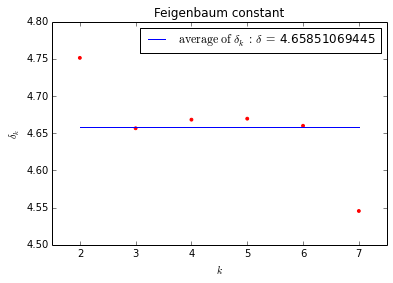

In [5]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy

b = [0.750000, 0.862372, 0.886023, 0.891102,
     0.892190, 0.892423, 0.892473, 0.892484]
#      b1         b2        b3        b4
#      b5         b6        b7        b8

def delta(k):
    return (b[k - 1] - b[k - 2]) / (b[k] - b[k - 1])

plt.gca().set_xlim(1.5, len(b) - 0.5)
plt.xlabel(r'$k$')
plt.ylabel(r'$\delta_{k}$')
plt.title('Feigenbaum constant')
sum_delta_k = 0

for k in range(2, len(b)):
    plt.scatter(k, delta(k), color='r', s=8, marker='o')
    sum_delta_k = sum_delta_k + delta(k)

ave_delta_k = sum_delta_k / 6

plt.plot([2, len(b) - 1], [ave_delta_k] * 2,
         label=r'$\mathrm{average}\ \mathrm{of}\ \delta_{k}\ :\ \delta \ =\ $'
         + str(ave_delta_k)
         )

plt.legend(loc="best")
plt.show()

表(1)に与えられた$b_{k}$の桁数について、$b_{k}$の間隔が$k$が大きくなるにつれて減少していくことを考えると、$b_{8}$の桁数などは十分であるとは言えないだろう。実際、平均値として得られた$\delta$が、精度よく求められている$\delta$の値に近いのに対して、本来$k$が大きいところでは収束するはずの$\delta_{k}$が、そこからずれた値となっていることも、$b_{8}$などの桁数が不足していることを表していると言える。

次に、最小2乗法により式(1)におけるパラメータ$c$、$r_{\infty}$を求めた。

In [4]:
import scipy.optimize as optimize
from numpy import *

delta = 4.669201609102991
b=[0.750000, 0.862372, 0.886023, 0.891102,
    0.892190, 0.892423, 0.892473, 0.892484]
k = range(1, len(b)+1)
#b = [0.886023, 0.891102, 0.892190, 0.892423]
#k = range(3, 7)
parameter0 = [1.0, 1.0]  # c, r_m　初期値

def fit_func(parameter0, k, b):
    c = parameter0[0]
    r_infinity = parameter0[1]
    residual = b - (r_infinity - c * delta ** (-k))
    return residual

result = optimize.leastsq(fit_func, parameter0, args=(array(k), array(b)))

print 'c =', result[0][0]
print 'r_infinity =', result[0][1]

c = 0.665237682254
r_infinity = 0.892546164091


ここで、得られた値$r_{\infty}=0.892 546 164 091$は非常に正確に調べられていて、その値は$r_{\infty}=0.892 486 417 967 \cdots$である。すなわち、得られた$r_{\infty}$はよく知られている値に対してわずか約0.007％の誤差で精度よく求めることができていることがわかる。

## まとめ

ファイゲンバウム定数の算出を行い、その普遍的性質への理解を深めることができた。

## 参考文献

- ハーベイ・ゴールド,ジャン・トボチニク,石川正勝・宮島佐介訳『計算物理学入門』,ピアソン・エデュケーション, 2000.